In [1]:
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
from CS.CS_Reconstruction import RecoCS
from CS.GenerateFixedFID import GenerateFIDfixed
import numpy as np
from CS.ComparisonMetrics import hamming, RMSE, trapzoid, simpson, get_RecoTQSQ
from numpy.fft import fft, ifft, fftshift

In [39]:
csGen = GenerateFIDfixed(PhasecycleAngle=5,NumPhaseCycles=16,StartPhase=45)
params, TQs = csGen.generateParamsFixed_TQ()
SNRs = csGen.varySNR(start=40, stop=70)
FIDs, x , params, SNRs = csGen.generateFIDsFixed(params, SNRs) # shape FIDs: (numFIDS, numphaseSteps)
targetAtqsq_woNoise = np.repeat(np.transpose(params[:,2]/params[:,0])*100, len(SNRs))
fidInput = FIDs

In [7]:
### CS Results as function of acceleration factor ################
csAlg = 'NUSF'
AccFactors = [2,4, 6, 8, 12, 16]
DataAll = []
for f in AccFactors:
    
    Reco = RecoCS(DataFull=fidInput, CS_Algorithm=csAlg, samplingMethod='PoissonGap', accelerationFactor=f)
    Reco.x = x # needed for NUSF    
    out = Reco.csReconstruction()
    TqSqAll = [a[2]/a[0] * 100 for a,_ in out]
    DataAll.append(TqSqAll)
    
    
    del Reco, out, TqSqAll
    

CS Alg.: NUSF
X data adjusted correctly ?
CS Alg.: NUSF
X data adjusted correctly ?
CS Alg.: NUSF
X data adjusted correctly ?
CS Alg.: NUSF
X data adjusted correctly ?
CS Alg.: NUSF
X data adjusted correctly ?
CS Alg.: NUSF
X data adjusted correctly ?


In [8]:
DataAll_NUSF = np.array(DataAll)

In [11]:
### CS Results as function of acceleration factor for IST-D ################
del DataAll
csAlg = 'IST-D'
AccFactors = [2,4, 6, 8, 12, 16]
DataAll = []

for f in AccFactors:
    
    Reco = RecoCS(DataFull=fidInput, CS_Algorithm=csAlg, samplingMethod='PoissonGap', accelerationFactor=f)  
    out = Reco.csReconstruction()
    ft_out = fftshift(fft(out))

    DataAll.append(get_RecoTQSQ(np.real(ft_out)))
    
    
    del out, ft_out

CS Alg.: IST-D
CS Alg.: IST-D
CS Alg.: IST-D
CS Alg.: IST-D
CS Alg.: IST-D
CS Alg.: IST-D


In [15]:
DataAll_ISTd = np.array(DataAll)
np.savetxt("CS_ISTd_1152_5.txt",DataAll_ISTd, fmt='%.4f')

In [28]:
### CS Results as function of acceleration factor for IST-D ################
del DataAll
csAlg = 'IST-S'
AccFactors = [2,4, 6, 8, 12, 16]
DataAll = []

for f in AccFactors:
    
    Reco = RecoCS(DataFull=fidInput, CS_Algorithm=csAlg, samplingMethod='PoissonGap', accelerationFactor=f) 
    out=Reco.csReconstruction()
    
    ft_out = fftshift(fft(out))

    DataAll.append(get_RecoTQSQ(np.real(ft_out)))
    
    
    del ft_out, Reco
DataAll_ISTs = np.array(DataAll)
del DataAll

CS Alg.: IST-S
CS Alg.: IST-S
CS Alg.: IST-S
CS Alg.: IST-S
CS Alg.: IST-S
CS Alg.: IST-S


In [18]:
targetAtqsq_woNoise[30]

10.0

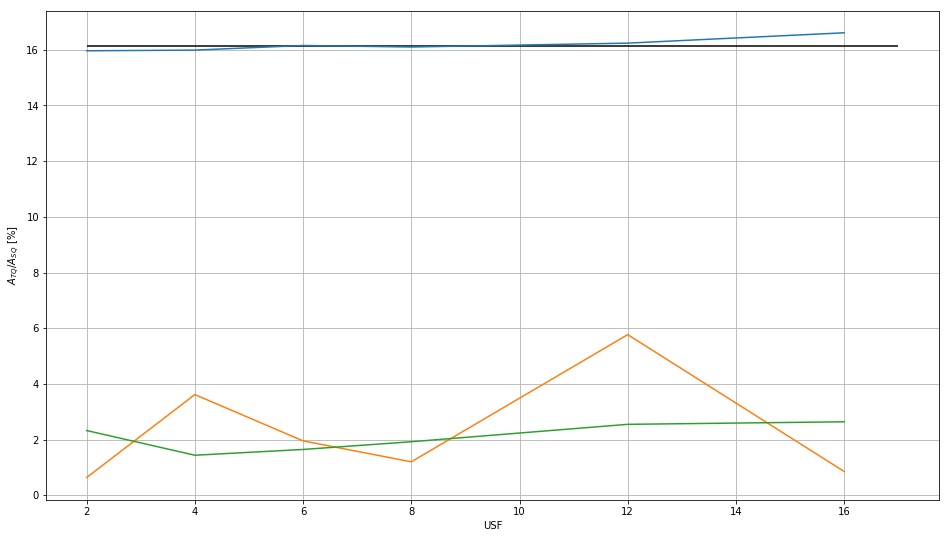

In [40]:
plt.figure(figsize=(16,9))
plt.plot(AccFactors, DataAll_NUSF[:,34])
plt.plot(AccFactors, DataAll_ISTd[:,34]*100)
plt.plot(AccFactors, DataAll_ISTs[:,34]*100)
plt.hlines(targetAtqsq_woNoise[34], xmin=AccFactors[0],xmax=AccFactors[-1]+1)
plt.xlabel("USF")
plt.ylabel(r"$A_{TQ}/A_{SQ}$ [%]")
plt.show()

In [37]:
targetAtqsq_woNoise

array([ 0.5,  0.5,  0.5,  1. ,  1. ,  1. ,  2. ,  2. ,  2. ,  3. ,  3. ,
        3. ,  4. ,  4. ,  4. ,  5. ,  5. ,  5. ,  6. ,  6. ,  6. ,  7. ,
        7. ,  7. ,  8. ,  8. ,  8. ,  9. ,  9. ,  9. , 10. , 10. , 10. ,
       12.5, 12.5, 12.5, 15. , 15. , 15. , 17.5, 17.5, 17.5, 20. , 20. ,
       20. , 22.5, 22.5, 22.5, 25. , 25. , 25. ])